# Day 27: Introduction to the K-Nearest Neighbors (K-NN) Algorithm

The K-Nearest Neighbors (K-NN) algorithm is a foundational concept in machine learning, known for its simplicity and effectiveness in various applications ranging from classification to regression tasks. This introductory lesson will cover the core aspects of K-NN, including its definition, importance, and some foundational knowledge on how it operates. We will also briefly touch on the applications of K-NN in different fields and settings.

## What is K-Nearest Neighbors?

K-Nearest Neighbors (K-NN) is a type of instance-based learning, or lazy learning, where the function is only approximated locally, and all computation is deferred until classification. The K-NN algorithm operates on a very simple principle: it classifies a new instance based on the majority class among its 'k' nearest neighbors. 

The K-Nearest Neighbors (K-NN) algorithm is a method for classifying objects based on closest training examples in the feature space. K-NN is a type of instance-based learning, where the algorithm doesn't explicitly learn a model. Instead, it memorizes the training instances which are subsequently used as “knowledge” for the prediction phase. In essence, the output of a K-NN classification is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its 'k' nearest neighbors ($k$ is a positive integer, typically small). If $k = 1$, then the object is simply assigned to the class of that single nearest neighbor.

### Importance

K-NN holds a special place in the realm of machine learning for several reasons. Its simplicity provides a clear intuition of how classification and regression can work, making it an excellent teaching tool. Moreover, K-NN's lazy learning nature makes it versatile and easy to implement for a broad range of problems without the need for complex model tuning or training. However, the choice of 'k' and the distance metric significantly affects the algorithm’s performance, introducing an essential balance between bias and variance. A small 'k' value means that noise will have a higher influence on the result, and a large 'k' makes the classification boundaries less distinct.

While K-NN is widely used and acclaimed for its simplicity, it's also worth noting its limitations, such as *the curse of dimensionality* and the potentially high computational cost for large datasets. However, with appropriate data preprocessing and dimensionality reduction techniques, K-NN continues to be a valuable tool for many practical applications.



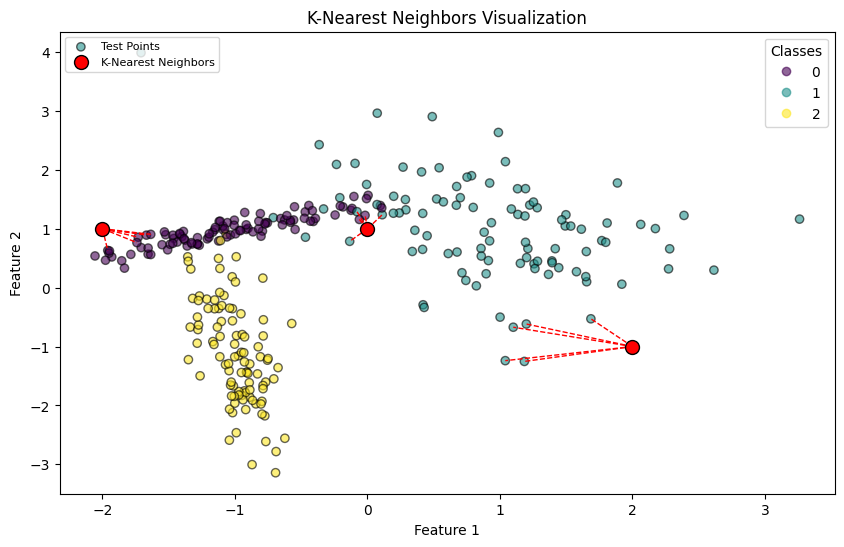

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import NearestNeighbors

# Data generation for a synthetic 2D classification dataset
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=3, n_samples=300, random_state=42)

# Choosing test points to classify and visualize their k-nearest neighbors
test_points = np.array([[0, 1], [-2, 1], [2, -1]])  # Example test points
k = 5  # Number of nearest neighbors to consider

# Fitting the Nearest Neighbors model
nn = NearestNeighbors(n_neighbors=k)
nn.fit(X)

# Finding the k-nearest neighbors for the test points
distances, indices = nn.kneighbors(test_points)

# Visualization
plt.figure(figsize=(10, 6))

# Scatter plot of the dataset, color coded by class
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6, edgecolor='k', cmap='viridis')

# Highlighting the test points
for point in test_points:
    plt.scatter(point[0], point[1], c='red', edgecolor='k', s=100, label='Test Points', zorder=5)

# Drawing lines from test points to their k-nearest neighbors
for i, point in enumerate(test_points):
    for neighbor_index in indices[i]:
        neighbor = X[neighbor_index]
        plt.plot([point[0], neighbor[0]], [point[1], neighbor[1]], 'r--', lw=1)

# Legend and labels
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend1)
plt.legend(['Test Points', 'K-Nearest Neighbors'], loc='upper left', fontsize=8)
plt.title('K-Nearest Neighbors Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

# Interpretation:
# This visualization illustrates the K-Nearest Neighbors (K-NN) concept. Each test point (red) is linked to its 'k' nearest neighbors
# with dashed lines, demonstrating how a classification decision is influenced by the neighbors in the feature space.



# Distance Metrics in K-NN

In this section, we will delve into the critical aspect of distance metrics, which are essential for the operation of the K-Nearest Neighbors (K-NN) algorithm. Distance metrics help in evaluating the distance or similarity between data points, allowing K-NN to classify or predict the output based on the input's neighbors. We will focus on two primary distance metrics: Euclidean distance and Manhattan distance, both of which are widely used in various machine learning algorithms, especially in K-NN.

## Definition

Distance metrics provide a method to calculate the "distance" between two points in space. The choice of metric can significantly influence the performance and results of the algorithm. In the context of the K-NN, these metrics are used to find the nearest neighbors based on the shortest distance.

### Euclidean Distance
The Euclidean distance between two points $\mathbf{p}$ and $\mathbf{q}$ in an n-dimensional space is defined as:  
$$d(\mathbf{p}, \mathbf{q}) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2}$$  
This formula calculates the straight-line distance between two points, making it geometrically intuitive.

### Manhattan Distance
The Manhattan distance, also known as city block distance, between two points $\mathbf{p}$ and $\mathbf{q}$ in an n-dimensional space is given by:  
$$d(\mathbf{p}, \mathbf{q}) = \sum_{i=1}^{n} |p_i - q_i|$$  
It sums up the absolute differences of their Cartesian coordinates, resembling walking through the blocks of a grid-based city.

## Importance

Distance metrics are crucial for algorithms that rely on the notion of "similarity" between data points, such as K-NN. The choice of metric can affect the algorithm’s accuracy and performance. Euclidean distance, being intuitive and simple, is suited for continuous data and tasks with the concept of actual geometric distance. Manhattan distance is particularly useful in scenarios where the grid-like structure is inherent, or when the data varies linearly.

## Applications and Examples

- **Euclidean Distance in Image Classification:** In image classification tasks, Euclidean distance can help compare the pixel intensities of images, treating each pixel as a dimension in space. It is useful for basic image recognition tasks where the geometric similarities between images indicate their labels.

- **Manhattan Distance in Urban Planning:** Manhattan distance finds applications in urban planning and navigation systems, where the distance between locations is measured along avenues and streets, closely resembling a grid.

- **Feature Similarity in Recommender Systems:** Distance metrics are employed in recommender systems to find similar items or users. For example, in movie recommendation systems, the Euclidean distance between users based on their ratings for common movies can suggest similarity.

### Choosing the Right Metric

The choice between Euclidean and Manhattan distances (or other metrics) depends on the specific requirements of the application and the data structure. Euclidean distance is preferred for isotropic data points that are evenly spread across all directions. In contrast, Manhattan distance is suitable for high-dimensional data or when the data has inherent grid-like properties.

Understanding these distance metrics and their applications provides a foundation for effectively implementing the K-NN algorithm and other machine learning models where the concept of distance or similarity is fundamental.



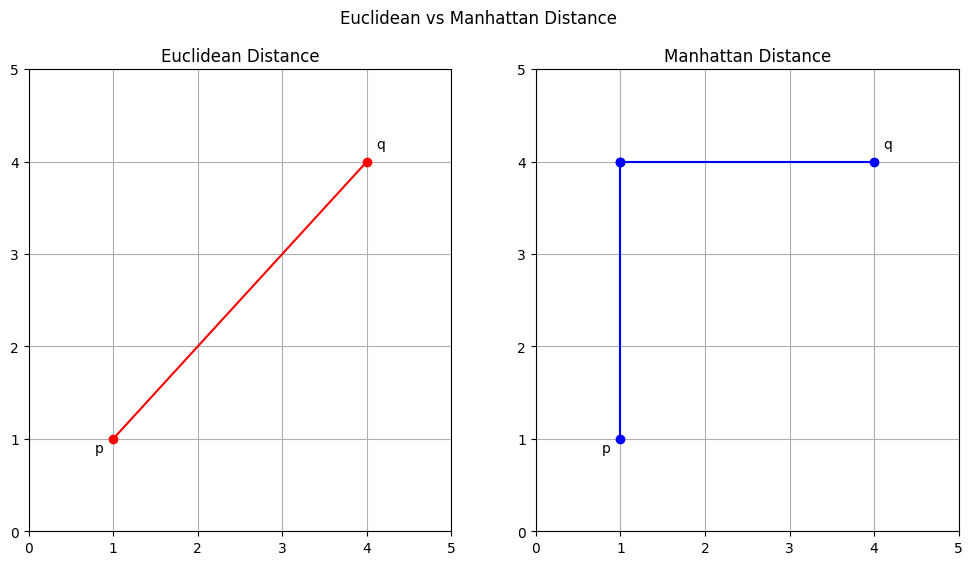

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Define points p and q
p = np.array([1, 1])
q = np.array([4, 4])

# Create a grid for plotting
grid_x, grid_y = np.meshgrid(np.arange(0, 6, 1), np.arange(0, 6, 1))

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot([p[0], q[0]], [p[1], q[1]], 'ro-')  # Euclidean distance line
ax[0].set_xticks(np.arange(0, 6, 1))
ax[0].set_yticks(np.arange(0, 6, 1))
ax[0].grid(True)
ax[0].set_title('Euclidean Distance')
ax[0].annotate('p', p, textcoords="offset points", xytext=(-10,-10), ha='center')
ax[0].annotate('q', q, textcoords="offset points", xytext=(10,10), ha='center')

# Manhattan distance line
ax[1].plot([p[0], p[0]], [p[1], q[1]], 'bo-')  # Vertical line
ax[1].plot([p[0], q[0]], [q[1], q[1]], 'bo-')  # Horizontal line
ax[1].set_xticks(np.arange(0, 6, 1))
ax[1].set_yticks(np.arange(0, 6, 1))
ax[1].grid(True)
ax[1].set_title('Manhattan Distance')
ax[1].annotate('p', p, textcoords="offset points", xytext=(-10,-10), ha='center')
ax[1].annotate('q', q, textcoords="offset points", xytext=(10,10), ha='center')

plt.suptitle('Euclidean vs Manhattan Distance')
plt.show()



# Implementing K-NN in Python

K-Nearest Neighbors (K-NN) is a simple, yet powerful machine learning algorithm used for classification and regression tasks. It belongs to the family of instance-based, or lazy learning algorithms, where the function is only approximated locally and all computation is deferred until classification. In this lesson, we will explore the practical application of the K-NN algorithm using Python's scikit-learn library, focusing initially on data preprocessing steps and then on implementing K-NN to fit models, make predictions, and evaluate performance.

- Preprocessing data to handle missing values and scale features, ensuring they contribute equally to the distance calculation.
- Selecting an appropriate 'k' value and understanding the potential trade-offs between bias and variance with different 'k' values.
- Utilizing `KNeighborsClassifier` from scikit-learn to train our model, make predictions, and assess its performance through accuracy metrics and a confusion matrix.
- Addressing challenges such as the curse of dimensionality and developing strategies to reduce its impact.

By the end of this section, learners will gain hands-on experience in applying the K-NN algorithm to solve real-world problems and understand the critical preprocessing and model evaluation steps necessary for successful implementation.


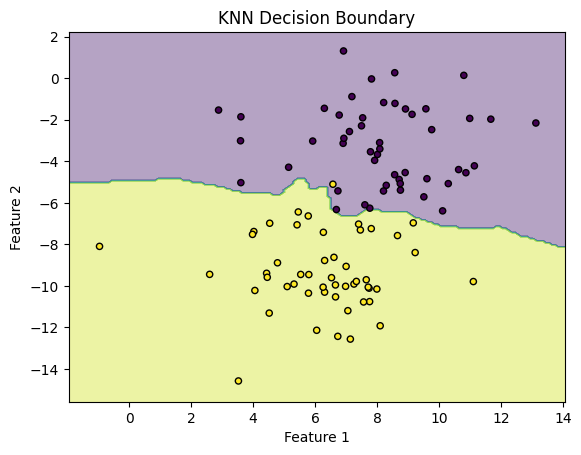

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Create a synthetic dataset.
# Change the "cluster_std" value to change the standard deviation, making the clusters tighter or more spread out.
# When they overlap, you can get "more interesting" (i.e. difficult to classify) synthetic data.
X, y = make_blobs(n_samples=100, centers=2, random_state=6, n_features=2, cluster_std=2.0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Step 3: Visualize the decision boundaries
# Create a mesh of points to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict class using KNN for each point in the mesh
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.title("KNN Decision Boundary")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [24]:
# evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Predictions on the test set
predictions = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print(f"""Accuracy:\t{accuracy:.3f}
Precision:\t{precision:.3f}
Recall:\t\t{recall:.3f}

Confusion Matrix:
{conf_matrix}
""")

Accuracy:	0.950
Precision:	1.000
Recall:		0.889

Confusion Matrix:
[[11  0]
 [ 1  8]]



# Exercise For The Reader

Your task is to apply the K-NN algorithm to the Iris dataset to classify instances into one of three possible species based on certain features like sepal length, sepal width, petal length, and petal width. You’ll preprocess the dataset, experiment with different 'k' values to find an appropriate one, possibly through trial and error or cross-validation, and use both Euclidean and Manhattan distance metrics to observe how they impact the model’s performance. Here's a step-by-step guide:

1. **Preprocess the Dataset**: Load the Iris dataset, explore it briefly (check for missing values, visualize data distribution, etc.), and split it into training and testing sets.

2. **Selecting 'k' and Distance Metrics**: Experiment with various 'k' values. Begin with `k=3` and adjust accordingly based on model performance. Implement both Euclidean and Manhattan distance calculations and compare their effects on your model’s accuracy.

3. **Model Evaluation**: Use accuracy as your metric to evaluate your model's performance. Additionally, present a confusion matrix to visualize the predictions made by your model.

This exercise will not only consolidate your understanding of K-NN but also expose you to practical considerations such as the choice of 'k' and the impact of different distance metrics on the model's performance. Happy coding!


Accuracy: 1.0


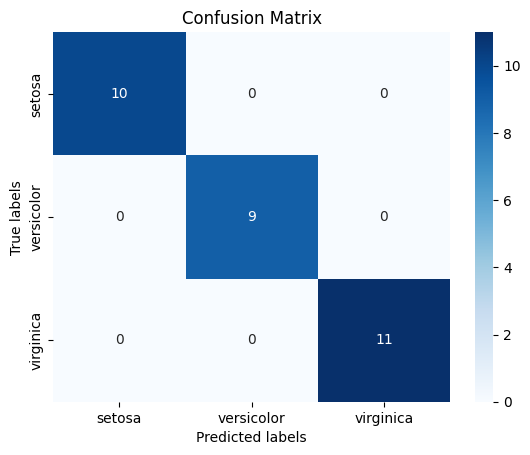

In [25]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns  # For plotting confusion matrix

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Data preprocessing

## Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model setup and training

## Placeholder for selecting 'k'
k = 3  # Start with k=3, and experiment with different values
## Placeholders for metric selection - 'euclidean' or 'manhattan'
metric = 'euclidean'  # Start with Euclidean, then try 'manhattan'

knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
knn.fit(X_train, y_train)

# Model evaluation

## Making predictions
y_pred = knn.predict(X_test)

## Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

## Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Notes for experimentation:
# - Try different values of 'k' and observe how the accuracy changes.
# - Experiment with the distance metric by changing the 'metric' parameter to 'manhattan' and compare the results.
# - Analyze the confusion matrix to understand the model's performance in more detail.




This template outlines the necessary steps for preprocessing the dataset, setting up the K-NN model, and evaluating its performance. You can follow the placeholders and notes for experimentation to understand the impact of different 'k' values and distance metrics on the model's accuracy and overall performance.
